1. Extract data from database
2. Preprocess the data

#  1. Extract data

In [1]:
import pandas as pd
import psycopg2

In [2]:
try:
    
    connection = psycopg2.connect(user = "postgres",
                                 password = "mdkn",
                                 host = "localhost", 
                                 database = "datapiece")
    
    cursor = connection.cursor()
    print("connection started")
    selectingFromSQL = "select * from air_bnb"
    
    cursor.execute(selectingFromSQL)
    records = cursor.fetchall()
    
except (Exception, psycopg2.Error) as error:
    print("Error while fetching data from PostgreSQL", error)
    
finally:
    # closing database connection.
    if connection:
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")
    

connection started
PostgreSQL connection is closed


In [3]:
columns =['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'review rate number', 'calculated host listings count',
       'availability 365']

In [4]:
data = pd.DataFrame(records, columns = columns)

In [5]:
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0,1.0,352.0
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,NaN,$696,None,7.0,12.0,5.0,1.0,0.0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,NaN,$909,None,1.0,19.0,3.0,2.0,0.0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,NaN,$387,None,2.0,50.0,4.0,2.0,235.0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,True,strict,Private room,NaN,$848,None,2.0,0.0,1.0,1.0,0.0


#  2. Preprocessing

1.ask                                                                                                                           
2.prepare data                                                                                                                   
3.preprocessing data                                                                                                             
4.clean data                                                                                                                     
5.vesualization                                                                                                                 

##  View the data

In [6]:
data.head(7)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,5.0,1.0,352.0
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,3.0,1.0,374.0
6,1004650,BlissArtsSpace!,61300605564,None,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2015.0,$71,$14,45.0,49.0,5.0,1.0,224.0


In [7]:
data.tail(7)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
102051,57364103,"A cozy getaway, home away from home",55697801194,verified,Isaiah,Brooklyn,East New York,40.66130,-73.89088,True,moderate,Private room,NaN,$147,None,1.0,0.0,4.0,1.0,88.0
102052,57364656,"☀️Private, cozy & quiet room in Inwood Manhatt...",74740790774,unconfirmed,Zhoe,Manhattan,Inwood,40.86857,-73.91577,True,flexible,Private room,NaN,"$1,183",None,4.0,95.0,2.0,1.0,323.0
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,NaN,$696,None,7.0,12.0,5.0,1.0,0.0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,NaN,$909,None,1.0,19.0,3.0,2.0,0.0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,NaN,$387,None,2.0,50.0,4.0,2.0,235.0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,True,strict,Private room,NaN,$848,None,2.0,0.0,1.0,1.0,0.0
102057,57367417,Rosalee Stewart,93578954226,verified,Stanley,Manhattan,Harlem,40.81315,-73.94747,False,flexible,Entire home/apt,2011.0,"$1,128",None,4.0,22.0,4.0,1.0,238.0


In [8]:
data.shape

(102058, 20)

In [9]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [10]:
#Replace spaces with underscore, and make all header in lower case.

data.columns = [col.lower().replace(" ","_") for col in data.columns]

In [11]:
#Convert all the data in all columns of the DataFrame to lowercase.

data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\3760878027.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   name                            101808 non-null  object 
 2   host_id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host_name                       101654 non-null  object 
 5   neighbourhood_group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   instant_bookable                101953 non-null  object 
 10  cancellation_policy             101982 non-null  object 
 11  room_type                       102058 non-null  object 
 12  construction_yea

*****************************************

Show values in each column

In [13]:
for i in data:
    print(f"*******************************|{ i }|**************************************")
    dfv = data[i].value_counts()
    dfv = pd.DataFrame({"Count":data[i].value_counts()})
    display(dfv)
    print()

*******************************|id|**************************************


,Count
id,
1001254,1
38582590,1
38581485,1
38580933,1
38580380,1
...,...
19789477,1
19788925,1
19788373,1



*******************************|name|**************************************


,Count
name,
home away from home,64
private room,44
hillside hotel,30
water view king bed hotel room,30
private room in brooklyn,29
...,...
cozy brooklyn heights - private room,1
beauty in the heart of downtown brooklyn,1
this place very quiet and fresh!,1



*******************************|host_id|**************************************


,Count
host_id,
29531702698,2
50581630001,1
68762673377,1
73658732887,1
19885857361,1
...,...
11073573721,1
62212747215,1
9019472962,1



*******************************|host_identity_verified|**************************************


,Count
host_identity_verified,
unconfirmed,50944
verified,50825



*******************************|host_name|**************************************


,Count
host_name,
michael,878
david,761
john,577
alex,543
sonder (nyc),516
...,...
giovanina,1
lele,1
ulviyya,1



*******************************|neighbourhood_group|**************************************


,Count
neighbourhood_group,
manhattan,43557
brooklyn,41630
queens,13197
bronx,2694
staten island,949
brookln,1
manhatan,1



*******************************|neighbourhood|**************************************


,Count
neighbourhood,
bedford-stuyvesant,7898
williamsburg,7732
harlem,5441
bushwick,4956
hell's kitchen,3949
...,...
willowbrook,3
gerritsen beach,3
fort wadsworth,2



*******************************|lat|**************************************


,Count
lat,
40.76411,36
40.71813,32
40.76125,28
40.73756,26
40.72440,25
...,...
40.87030,1
40.85722,1
40.81852,1



*******************************|long|**************************************


,Count
long,
-73.99371,44
-73.95350,38
-73.95427,37
-73.94791,37
-73.95677,34
...,...
-73.86892,1
-73.85859,1
-73.89066,1



*******************************|instant_bookable|**************************************


,Count
instant_bookable,
False,51186
True,50767



*******************************|cancellation_policy|**************************************


,Count
cancellation_policy,
moderate,34162
strict,33929
flexible,33891



*******************************|room_type|**************************************


,Count
room_type,
entire home/apt,53429
private room,46306
shared room,2208
hotel room,115



*******************************|construction_year|**************************************


,Count
construction_year,
2014.0,5220
2008.0,5192
2006.0,5191
2019.0,5174
2009.0,5140
2020.0,5135
2010.0,5128
2022.0,5113
2003.0,5103



*******************************|price|**************************************


,Count
price,
$206,135
"$1,056",131
$481,129
$833,127
$573,126
...,...
$923,57
$369,57
$786,54



*******************************|service_fee|**************************************


,Count
service_fee,
$216,523
$41,519
$81,515
$177,515
$57,509
...,...
$73,385
$58,379
$67,378



*******************************|minimum_nights|**************************************


,Count
minimum_nights,
1.0,25290
2.0,23495
3.0,16038
30.0,11554
4.0,6606
...,...
-3.0,1
273.0,1
175.0,1



*******************************|number_of_reviews|**************************************


,Count
number_of_reviews,
0.0,15673
1.0,10348
2.0,7129
3.0,5341
4.0,4125
...,...
567.0,1
592.0,1
797.0,1



*******************************|review_rate_number|**************************************


,Count
review_rate_number,
5.0,23251
4.0,23200
3.0,23130
2.0,22972
1.0,9186



*******************************|calculated_host_listings_count|**************************************


,Count
calculated_host_listings_count,
1.0,63121
2.0,14380
3.0,6536
4.0,3529
5.0,1977
...,...
86.0,21
22.0,20
55.0,15



*******************************|availability_365|**************************************


,Count
availability_365,
0.0,23448
365.0,2484
364.0,1162
89.0,746
1.0,731
...,...
412.0,32
-6.0,31
401.0,30


*************************************************************

See if there are any duplicated 

In [14]:
data.duplicated().sum()

0

**********************

Describe all columns

In [15]:
for i in data:
    print(f"*******************************|{ i }|**************************************")
    df = pd.DataFrame(data[i].describe())
    display(df)
    print()

*******************************|id|**************************************


,id
count,1.020580e+05
mean,2.918438e+07
std,1.627173e+07
min,1.001254e+06
25%,1.509286e+07
50%,2.918438e+07
75%,4.327590e+07
max,5.736742e+07



*******************************|name|**************************************


,name
count,101808
unique,60664
top,home away from home
freq,64



*******************************|host_id|**************************************


,host_id
count,1.020580e+05
mean,4.926738e+10
std,2.853742e+10
min,1.236005e+08
25%,2.459924e+10
50%,4.912865e+10
75%,7.400619e+10
max,9.876313e+10



*******************************|host_identity_verified|**************************************


,host_identity_verified
count,101769
unique,2
top,unconfirmed
freq,50944



*******************************|host_name|**************************************


,host_name
count,101654
unique,13158
top,michael
freq,878



*******************************|neighbourhood_group|**************************************


,neighbourhood_group
count,102029
unique,7
top,manhattan
freq,43557



*******************************|neighbourhood|**************************************


,neighbourhood
count,102042
unique,224
top,bedford-stuyvesant
freq,7898



*******************************|lat|**************************************


,lat
count,102050.000000
mean,40.728097
std,0.055852
min,40.499790
25%,40.688730
50%,40.722290
75%,40.762760
max,40.916970



*******************************|long|**************************************


,long
count,102050.000000
mean,-73.949652
std,0.049502
min,-74.249840
25%,-73.982580
50%,-73.954440
75%,-73.932350
max,-73.705220



*******************************|instant_bookable|**************************************


,instant_bookable
count,101953
unique,2
top,False
freq,51186



*******************************|cancellation_policy|**************************************


,cancellation_policy
count,101982
unique,3
top,moderate
freq,34162



*******************************|room_type|**************************************


,room_type
count,102058
unique,4
top,entire home/apt
freq,53429



*******************************|construction_year|**************************************


,construction_year
count,101844.000000
mean,2012.488090
std,5.765838
min,2003.000000
25%,2007.000000
50%,2012.000000
75%,2017.000000
max,2022.000000



*******************************|price|**************************************


,price
count,101811
unique,1151
top,$206
freq,135



*******************************|service_fee|**************************************


,service_fee
count,101785
unique,231
top,$216
freq,523



*******************************|minimum_nights|**************************************


,minimum_nights
count,101658.000000
mean,8.126640
std,30.616698
min,-1223.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,5645.000000



*******************************|number_of_reviews|**************************************


,number_of_reviews
count,101875.000000
mean,27.517948
std,49.571744
min,0.000000
25%,1.000000
50%,7.000000
75%,31.000000
max,1024.000000



*******************************|review_rate_number|**************************************


,review_rate_number
count,101739.000000
mean,3.278733
std,1.285089
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000



*******************************|calculated_host_listings_count|**************************************


,calculated_host_listings_count
count,101739.000000
mean,7.936937
std,32.266355
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,332.000000



*******************************|availability_365|**************************************


,availability_365
count,101610.000000
mean,141.043992
std,135.429156
min,-10.000000
25%,3.000000
50%,96.000000
75%,268.000000
max,3677.000000


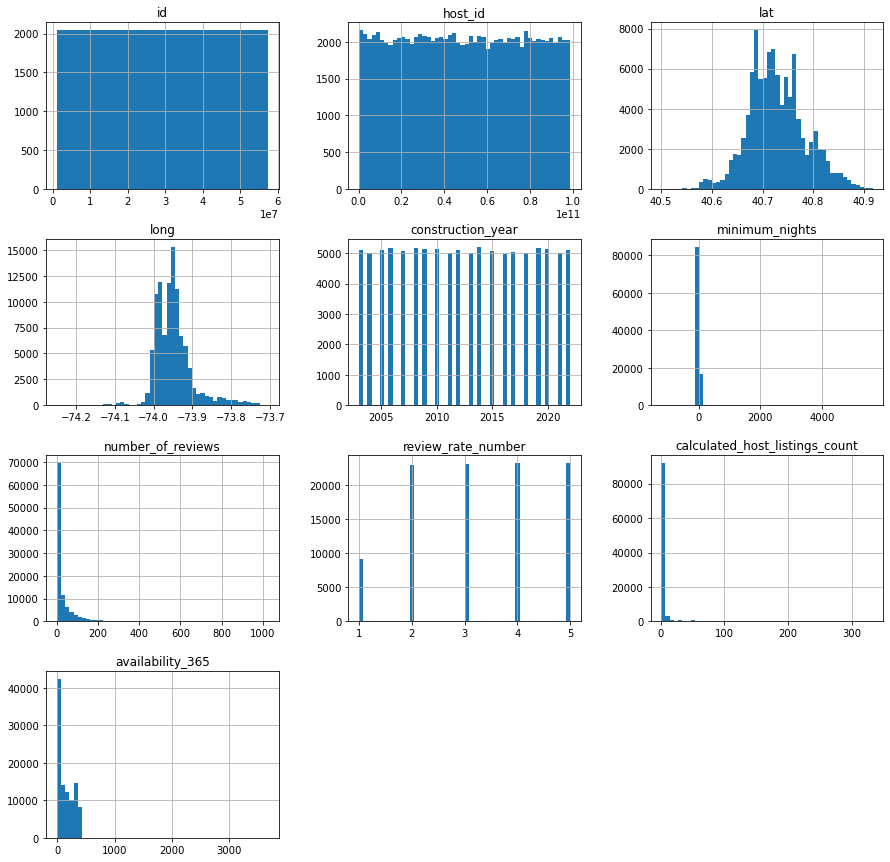

In [16]:
import matplotlib.pyplot as plt
data.hist(figsize=(15,15), bins=50)
plt.show()

# Cleaning data

## Check the data type for each column

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   name                            101808 non-null  object 
 2   host_id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host_name                       101654 non-null  object 
 5   neighbourhood_group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   instant_bookable                101953 non-null  object 
 10  cancellation_policy             101982 non-null  object 
 11  room_type                       102058 non-null  object 
 12  construction_yea

*******************

We'll convert the data type for each of ['price', 'service_fee', 'mininum_nights', 'availability_365'] to (int)

But first check if there any error in the values in some columns.

********************************

In ['price', 'service_fee'] the values must be as a dollar.

In [18]:
data['price'].head(3)

0    $966 
1    $142 
2    $620 
Name: price, dtype: object

In [19]:
data['price'] = data['price'].astype(str)

filtered_values = data[~data['price'].str.startswith('$')]
print(filtered_values['price'].tolist())

['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',

In [20]:
data['service_fee'].head(3)

0    $193 
1     $28 
2    $124 
Name: service_fee, dtype: object

In [21]:
data['service_fee'] = data['service_fee'].astype(str)

filtered_values = data[~data['service_fee'].str.startswith('$')]
print(filtered_values['service_fee'].tolist())

['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',

***************************

In ['construction_year'] could'nt has a number after the decimal point.

In [22]:
data['construction_year'].head(3)

0    2020.0
1    2007.0
2    2005.0
Name: construction_year, dtype: float64

In [23]:
data[data["construction_year"]%1 != 0].value_counts()

Series([], Name: count, dtype: int64)

.All values entered in correct way                                                                                               

*****************************************

There are some values in "neighbourhood_group" which entered in wrong way
we'll correct it.

In [24]:
data.loc[data['neighbourhood_group'] == 'brookln', 'neighbourhood_group'] = 'brooklyn'
data.loc[data['neighbourhood_group'] == 'manhatan', 'neighbourhood_group'] = 'manhattan'

**********************************

We'll check if there are any values in ['minimum_nights'] column those < 1, becouse the less value must be = 1.

In [25]:
len(data[data['minimum_nights']<1])

13

There are 13 vlaue which < 1, now we'll take the abs for all one of it.

In [26]:
data['minimum_nights'] = abs(data['minimum_nights'])

In [27]:
len(data[data['minimum_nights']<1])

0

In [28]:
data.shape

(102058, 20)

*********************************************

We'll check if there are any wrong values in ['availability_365'] column, all values must be between (0 and 365).

All values that less than 1 will convert to abs and all values that greater than 365 will be 365.

In [29]:
data['availability_365'] = abs(data['availability_365'])

In [30]:
n = -1
for i in data['availability_365']:
    n = n + 1
    if i > 365:
        data['availability_365'].iloc[n] = 365
        
    else:
        continue


C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['availability_365'].iloc[n] = 365
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1438198153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avai

In [31]:
data[data['availability_365'] > 365]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365


In [32]:
data.shape

(102058, 20)

All values are processed.

**********************************

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   name                            101808 non-null  object 
 2   host_id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host_name                       101654 non-null  object 
 5   neighbourhood_group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   instant_bookable                101953 non-null  object 
 10  cancellation_policy             101982 non-null  object 
 11  room_type                       102058 non-null  object 
 12  construction_yea

********************************************************

Now we'll convert the data type for ['price', 'service_fee', 'mininum_nights', 'availability_365', 'construction_year']

but there are some null value and some problem in entered data in all one of their, so we'll handel all problem then we'll convert the data type for each one of the columns.

*********************************

## Preprocessing the null value

In [36]:
null_values = data.isnull().sum()
null_values = pd.DataFrame({"null":null_values})
null_values

,null
id,0
name,250
host_id,0
host_identity_verified,289
host_name,404
neighbourhood_group,29
neighbourhood,16
lat,8
long,8
instant_bookable,105


In [37]:
## Count the missing values of every column in terms of % and show the result

# calculate the % missing values
percentage_result = data.isnull().sum()/data.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,id,0.000000
1,name,0.244959
2,host_id,0.000000
3,host_identity_verified,0.283172
4,host_name,0.395853
5,neighbourhood_group,0.028415
6,neighbourhood,0.015677
7,lat,0.007839
8,long,0.007839
9,instant_bookable,0.102883


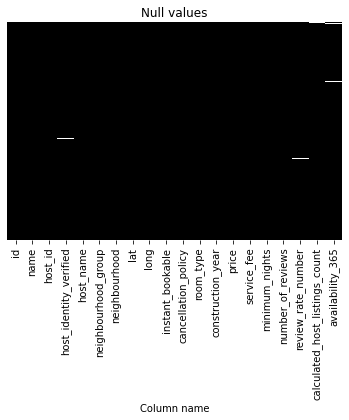

In [38]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='gist_heat')
plt.title("Null values")
plt.xlabel("Column name")
plt.show()

In [39]:
data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

**************************************

In [40]:
# Replace null values in "name" column with "id" values

data['name'].fillna(data['id'], inplace=True)

******************************************

In [41]:
data['host_identity_verified'].fillna("unconfirmed", inplace  = True)

******************************************

In [43]:
data['host_name'].fillna(data['host_id'], inplace=True)

******************************************

In [44]:
grouped = data.groupby('neighbourhood_group')['neighbourhood'].apply(list).reset_index()
grouped

,neighbourhood_group,neighbourhood
0,bronx,"[highbridge, highbridge, clason point, kingsbr..."
1,brooklyn,"[kensington, clinton hill, bedford-stuyvesant,..."
2,manhattan,"[midtown, harlem, east harlem, murray hill, he..."
3,queens,"[long island city, flushing, sunnyside, ridgew..."
4,staten island,"[st. george, tompkinsville, tompkinsville, tom..."


In [45]:
group1 = list(grouped.iloc[0, :])
group2 = list(grouped.iloc[1, :])
group3 = list(grouped.iloc[2, :])
group4 = list(grouped.iloc[3, :])
group5 = list(grouped.iloc[4, :])

In [46]:
n = -1
for i in(data.loc[: , 'neighbourhood_group':'neighbourhood'].values):
    n = n + 1
    if pd.isnull(i[0]):
        if i[1] in group1[1]:
            data['neighbourhood_group'].iloc[n] = 'bronx'
            
        elif i[1] in group2[1]:
            data['neighbourhood_group'].iloc[n] = 'brooklyn'
            
        elif i[1] in group3[1]:
            data['neighbourhood_group'].iloc[n] = 'manhattan' 
            
        elif i[1] in group4[1]:
            data['neighbourhood_group'].iloc[n] = 'queens'
          
        elif i[1] in group5[1]:
            data['neighbourhood_group'].iloc[n] = 'staten island'

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\3697544101.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_group'].iloc[n] = 'manhattan'
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\3697544101.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_group'].iloc[n] = 'brooklyn'
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\3697544101.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\3697544101.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_group'].iloc[n] = 'brooklyn'
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\3697544101.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_group'].iloc[n] = 'manhattan'


******************************************

In [47]:
from collections import Counter
n = -1
for i in(data.loc[: , 'neighbourhood_group':'neighbourhood'].values):
    n = n + 1
    if pd.isnull(i[1]):
        if i[0] in group1[0]:
            data['neighbourhood'].iloc[n] = max(group1[1], key=group1[1].count)
            
        elif i[0] in group2[0]:
            data['neighbourhood'].iloc[n] = max(group1[1], key=group1[1].count)
            
        elif i[0] in group3[0]:
            data['neighbourhood'].iloc[n] = max(group1[1], key=group1[1].count)
            
            
        elif i[0] in group4[0]:
            data['neighbourhood_'].iloc[n] = max(group1[1], key=group1[1].count)
          
        elif i[0] in group5[0]:
            data['neighbourhood'].iloc[n] = max(group1[1], key=group1[1].count)

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1176559657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood'].iloc[n] = max(group1[1], key=group1[1].count)
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1176559657.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood'].iloc[n] = max(group1[1], key=group1[1].count)
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1176559657.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

******************************************

In [49]:
grouped = data.groupby('neighbourhood_group')['lat'].apply(list).reset_index()
grouped

,neighbourhood_group,lat
0,bronx,"[40.83232, 40.83075, 40.81309, 40.88057, 40.87..."
1,brooklyn,"[40.64749, 40.68514, 40.68688, 40.68688, 40.66..."
2,manhattan,"[40.75362, 40.80902, 40.79851, 40.74767, 40.76..."
3,queens,"[40.74771, 40.75038, 40.74028, 40.74559, 40.70..."
4,staten island,"[40.64524, 40.63536, 40.63627, 40.63518, 40.63..."


In [50]:
group1 = list(grouped.iloc[0, :])
group2 = list(grouped.iloc[1, :])
group3 = list(grouped.iloc[2, :])
group4 = list(grouped.iloc[3, :])
group5 = list(grouped.iloc[4, :])

In [51]:
import numpy as np
sum = 0
n = -1
for i in group1[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
lat1mean = sum/ n

print(f'lat1mean = {lat1mean}')
###############################################################
sum = 0
n = -1
for i in group2[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
lat2mean = sum/ n

print(f'lat2mean = {lat2mean}')
###############################################################
sum = 0
n = -1
for i in group3[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
lat3mean = sum/ n

print(f'lat3mean = {lat3mean}')
###############################################################
sum = 0
n = -1
for i in group4[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
lat4mean = sum/ n

print(f'lat4mean = {lat4mean}')
###############################################################
sum = 0
n = -1
for i in group5[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
lat5mean = sum/ n

print(f'lat5mean = {lat5mean}')

lat1mean = 40.8644325362991
lat2mean = 40.68187489073415
lat3mean = 40.76249589413759
lat4mean = 40.728579022889065
lat5mean = 40.65454800316455


In [52]:
n = -1
for i in(data.loc[: , ['neighbourhood_group','lat']].values):
    n = n + 1
    if pd.isnull(i[1]):
        if i[0] in group1[0]:
            data['lat'].iloc[n] = lat1mean
            
        elif i[0] in group2[0]:
            data['lat'].iloc[n] = lat2mean
            
        elif i[0] in group3[0]:
            data['lat'].iloc[n] = lat3mean 
            
        elif i[0] in group4[0]:
            data['lat'].iloc[n] = lat4mean
          
        elif i[0] in group5[0]:
            data['lat'].iloc[n] = lat5mean

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2486898677.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lat'].iloc[n] = lat2mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2486898677.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lat'].iloc[n] = lat2mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2486898677.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lat'].iloc[n] = lat

******************************************

In [53]:
grouped = data.groupby('neighbourhood_group')['long'].apply(list).reset_index()
grouped

,neighbourhood_group,long
0,bronx,"[-73.93184, -73.93058, -73.85514, -73.83572, -..."
1,brooklyn,"[-73.97237, -73.95976, -73.95596, -73.95596, -..."
2,manhattan,"[-73.98377, -73.9419, -73.94399, -73.975, -73...."
3,queens,"[-73.9474, -73.90334, -73.83168, -73.92313, -7..."
4,staten island,"[-74.08088, -74.08537, -74.08543, -74.08546, -..."


In [54]:
group1 = list(grouped.iloc[0, :])
group2 = list(grouped.iloc[1, :])
group3 = list(grouped.iloc[2, :])
group4 = list(grouped.iloc[3, :])
group5 = list(grouped.iloc[4, :])

In [56]:
import numpy as np
sum = 0
n = -1
for i in group1[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
long1mean = sum/ n

print(f'long1mean = {long1mean}')
###############################################################
sum = 0
n = -1
for i in group2[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
long2mean = sum/ n

print(f'long2mean = {long2mean}')
###############################################################
sum = 0
n = -1
for i in group3[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
long3mean = sum/ n

print(f'long3mean = {long3mean}')
###############################################################
sum = 0
n = -1
for i in group4[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
long4mean = sum/ n

print(f'long4mean = {long4mean}')
###############################################################
sum = 0
n = -1
for i in group5[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
long5mean = sum/ n

print(f'long5mean = {long5mean}')

long1mean = -73.91070554780619
long2mean = -73.94694198845443
long3mean = -73.9693067485078
long4mean = -73.86767670474123
long5mean = -74.18330944620251


In [57]:
n = -1
for i in(data.loc[: , ['neighbourhood_group','long']].values):
    n = n + 1
    if pd.isnull(i[1]):
        if i[0] in group1[0]:
            data['long'].iloc[n] = long1mean
            
        elif i[0] in group2[0]:
            data['long'].iloc[n] = long2mean
            
        elif i[0] in group3[0]:
            data['long'].iloc[n] = long3mean 
            
        elif i[0] in group4[0]:
            data['long'].iloc[n] = long4mean
          
        elif i[0] in group5[0]:
            data['long'].iloc[n] = long5mean

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1567294279.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['long'].iloc[n] = long2mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1567294279.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['long'].iloc[n] = long2mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\1567294279.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['long'].iloc[n] 

******************************************

In [58]:
data['instant_bookable'].fillna(False, inplace=True)

******************************************

In [59]:
data['cancellation_policy'].mode()

0    moderate
Name: cancellation_policy, dtype: object

In [60]:
data['cancellation_policy'].fillna('moderate', inplace=True)

******************************************

imput the null value in construction_year with the bacwarde value.

In [61]:
data['construction_year'].ffill(inplace=True)

******************************************

In [62]:
data['number_of_reviews'].fillna(1, inplace = True)

******************************************

In [63]:
data['review_rate_number'].fillna(1, inplace=True)

******************************************

In [64]:
data['calculated_host_listings_count'].fillna(1,inplace = True)

******************************************

In [65]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '')

In [66]:
data['price'].value_counts()

price
None     247
206      135
1056     131
481      129
833      127
        ... 
923       57
369       57
786       54
89        53
187       52
Name: count, Length: 1152, dtype: int64

There are some string values is 'None', we'll convert it to null values then we'll handel it.

In [67]:
data['price'] = data['price'].replace('None', float('nan'))

In [68]:
data['price'].isnull().sum()

247

Now we'll convert the data type for 'price' to float.

Float data type accept null values

In [69]:
data['price'] = data['price'].astype(float)

In [70]:
grouped = data.groupby('neighbourhood_group')['price'].apply(list).reset_index()
grouped


,neighbourhood_group,price
0,bronx,"[483.0, 538.0, 643.0, 909.0, 55.0, 811.0, 101...."
1,brooklyn,"[966.0, 368.0, 71.0, 1060.0, 580.0, 778.0, 656..."
2,manhattan,"[142.0, 620.0, 204.0, 577.0, 1018.0, 291.0, 31..."
3,queens,"[916.0, 54.0, 606.0, 355.0, 724.0, 1084.0, 938..."
4,staten island,"[1015.0, 725.0, 784.0, 593.0, 1032.0, 629.0, 6..."


In [71]:
group1 = list(grouped.iloc[0, :])
group2 = list(grouped.iloc[1, :])
group3 = list(grouped.iloc[2, :])
group4 = list(grouped.iloc[3, :])
group5 = list(grouped.iloc[4, :])

In [72]:
import numpy as np
sum = 0
n = -1
for i in group1[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g1mean = sum/ n

print(f'g1mean = {g1mean}')
###############################################################
sum = 0
n = -1
for i in group2[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g2mean = sum/ n

print(f'g2mean = {g2mean}')
###############################################################
sum = 0
n = -1
for i in group3[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g3mean = sum/ n

print(f'g3mean = {g3mean}')
###############################################################
sum = 0
n = -1
for i in group4[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g4mean = sum/ n

print(f'g4mean = {g4mean}')
###############################################################
sum = 0
n = -1
for i in group5[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g5mean = sum/ n

print(f'g5mean = {g5mean}')

g1mean = 626.4710467706013
g2mean = 625.1496289892659
g3mean = 621.0709433096167
g4mean = 628.6484315805425
g5mean = 622.6740506329114


In [73]:
n = -1
for i in(data.loc[: , ['neighbourhood_group','price']].values):
    n = n + 1
    if pd.isnull(i[1]):
        if i[0] in group1[0]:
            data['price'].iloc[n] = g1mean
            
        elif i[0] in group2[0]:
            data['price'].iloc[n] = g2mean
            
        elif i[0] in group3[0]:
            data['price'].iloc[n] = g3mean 
            
        elif i[0] in group4[0]:
            data['price'].iloc[n] = g4mean
          
        elif i[0] in group5[0]:
            data['price'].iloc[n] = g5mean

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = g2mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = g3mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = g

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = g2mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = g3mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = g

C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = g4mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = g2mean
C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\2251124331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'].iloc[n] = 

*************************************************

In [75]:
data['service_fee'] = data['service_fee'].str.replace('$', '').str.replace(',', '')

In [77]:
data['service_fee'].value_counts()

service_fee
216     523
41      519
177     515
81      515
57      509
       ... 
58      379
67      378
None    273
10      265
240     247
Name: count, Length: 232, dtype: int64

There are some string values is 'None', we'll convert it to null values then we'll handel it.

In [78]:
data['service_fee'] = data['service_fee'].replace('None', float('nan'))

In [79]:
data['service_fee'].isnull().sum()

273

Now we'll convert the data type for 'service_fee' to float.

Float data type accept null values

In [80]:
data['service_fee'] = data['service_fee'].astype(float)

In [81]:
grouped = data.groupby('neighbourhood_group')['service_fee'].apply(list).reset_index()
grouped


,neighbourhood_group,service_fee
0,bronx,"[97.0, 108.0, 129.0, 182.0, 11.0, 162.0, 20.0,..."
1,brooklyn,"[193.0, 74.0, 14.0, 212.0, 116.0, nan, nan, na..."
2,manhattan,"[28.0, 124.0, 41.0, 115.0, 204.0, 58.0, 64.0, ..."
3,queens,"[183.0, 11.0, 121.0, 71.0, 145.0, 217.0, 188.0..."
4,staten island,"[203.0, 145.0, 157.0, 119.0, 206.0, 126.0, 135..."


In [82]:
group1 = list(grouped.iloc[0, :])
group2 = list(grouped.iloc[1, :])
group3 = list(grouped.iloc[2, :])
group4 = list(grouped.iloc[3, :])
group5 = list(grouped.iloc[4, :])

In [83]:
import numpy as np
sum = 0
n = -1
for i in group1[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g1mean = sum/ n

print(f'g1mean = {g1mean}')
###############################################################
sum = 0
n = -1
for i in group2[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g2mean = sum/ n

print(f'g2mean = {g2mean}')
###############################################################
sum = 0
n = -1
for i in group3[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g3mean = sum/ n

print(f'g3mean = {g3mean}')
###############################################################
sum = 0
n = -1
for i in group4[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g4mean = sum/ n

print(f'g4mean = {g4mean}')
###############################################################
sum = 0
n = -1
for i in group5[1]:
    n = n + 1
    if pd.isnull(i):
        continue
    else:
        sum = sum + i
    
g5mean = sum/ n

print(f'g5mean = {g5mean}')

g1mean = 125.23793615441723
g2mean = 124.89222678481377
g3mean = 124.20397062198761
g4mean = 125.71889680254584
g5mean = 124.51160337552743


In [86]:
n = -1
for i in(data.loc[: , ['neighbourhood_group','service_fee']].values):
    n = n + 1
    if pd.isnull(i[1]):
        if i[0] in group1[0]:
            data['service_fee'].iloc[n] = g1mean
            
        elif i[0] in group2[0]:
            data['service_fee'].iloc[n] = g2mean
            
        elif i[0] in group3[0]:
            data['service_fee'].iloc[n] = g3mean 
            
        elif i[0] in group4[0]:
            data['service_fee'].iloc[n] = g4mean
          
        elif i[0] in group5[0]:
            data['service_fee'].iloc[n] = g5mean

*******************************

In [87]:
data['minimum_nights'].fillna(1, inplace = True)

******************************************************

In [88]:
mean_value = data['availability_365'].mean()

In [90]:
data['availability_365'].fillna(mean_value, inplace = True)

*******************************************************************

We check if there are any null values.

In [91]:
percentage_result = data.isnull().sum()/data.shape[0] * 100
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,id,0.0
1,name,0.0
2,host_id,0.0
3,host_identity_verified,0.0
4,host_name,0.0
5,neighbourhood_group,0.0
6,neighbourhood,0.0
7,lat,0.0
8,long,0.0
9,instant_bookable,0.0


In [92]:
data.isna().any()

id                                False
name                              False
host_id                           False
host_identity_verified            False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
lat                               False
long                              False
instant_bookable                  False
cancellation_policy               False
room_type                         False
construction_year                 False
price                             False
service_fee                       False
minimum_nights                    False
number_of_reviews                 False
review_rate_number                False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

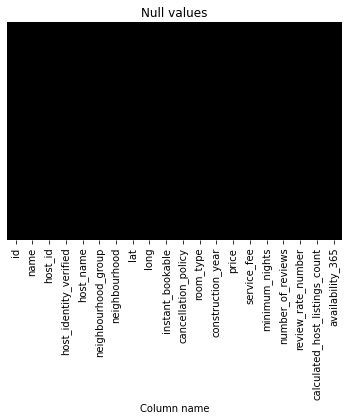

In [93]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='gist_heat')
plt.title("Null values")
plt.xlabel("Column name")
plt.show()

Now after handling the null values, we'll convert the data type for all of ['construction_year', 'minimum_nights', 'availability_365'].

In [95]:
data['construction_year'] = data['construction_year'].astype(int)

In [96]:
data['minimum_nights'] = data['minimum_nights'].astype(int)

In [97]:
data['availability_365'] = data['availability_365'].astype(int)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   name                            102058 non-null  object 
 2   host_id                         102058 non-null  int64  
 3   host_identity_verified          102058 non-null  object 
 4   host_name                       102058 non-null  object 
 5   neighbourhood_group             102058 non-null  object 
 6   neighbourhood                   102058 non-null  object 
 7   lat                             102058 non-null  float64
 8   long                            102058 non-null  float64
 9   instant_bookable                102058 non-null  bool   
 10  cancellation_policy             102058 non-null  object 
 11  room_type                       102058 non-null  object 
 12  construction_yea

In [95]:
#now we finish from null values, we'll return the sorting data depnding on construction_year
data = data.sort_values(by='construction_year', ascending = False)

## processing the outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


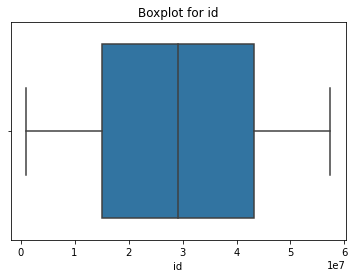

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


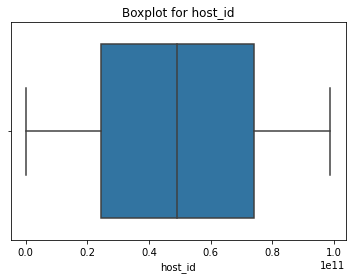

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


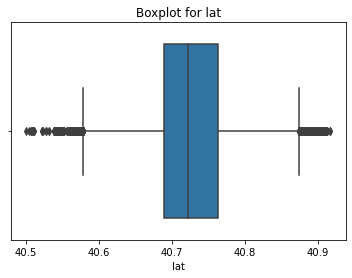

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


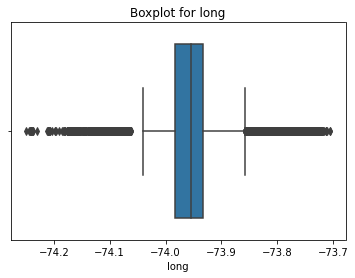

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


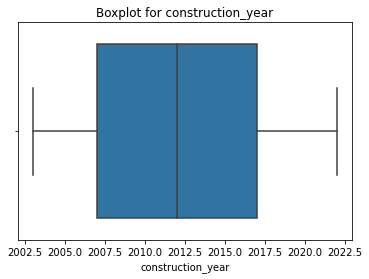

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


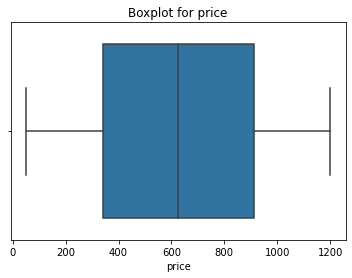

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


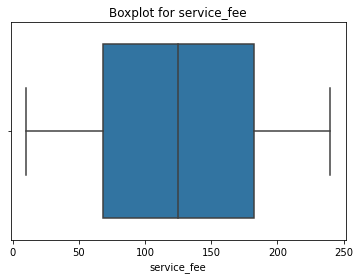

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


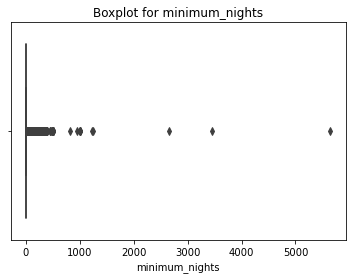

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


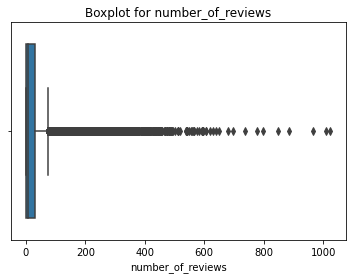

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


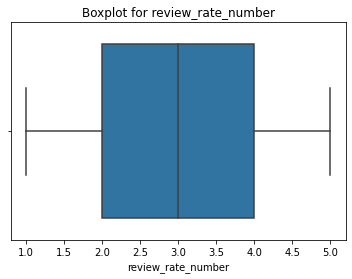

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


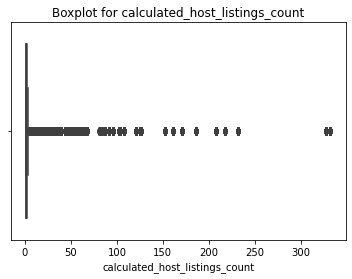

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


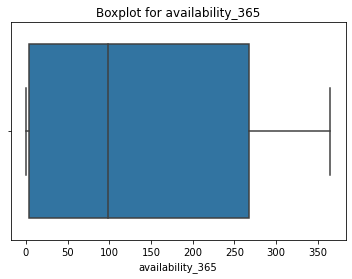

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Get a list of numeric column names
numeric_cols = data.select_dtypes(include=['number']).columns

# Create boxplots for each numeric column using Seaborn
for col in numeric_cols:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


Impute Outliers with median

In [101]:
import pandas as pd
import numpy as np



# Define a function to impute outliers with the median
def impute_outliers_with_median(series):
    # Calculate the median without outliers (using the IQR method)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the median
    return series.apply(lambda x: series.median() if x < lower_bound or x > upper_bound else x)

# Select num features for outlier imputation
num_features = data.select_dtypes(include=[np.number]).columns

# Impute outliers for each quantitative feature
for feature in num_features:
    data[feature] = impute_outliers_with_median(data[feature])

# The DataFrame now contains quantitative features with outliers imputed using the median


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


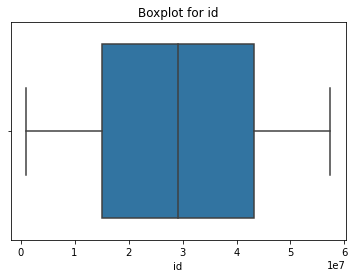

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


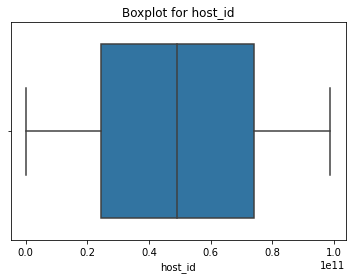

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


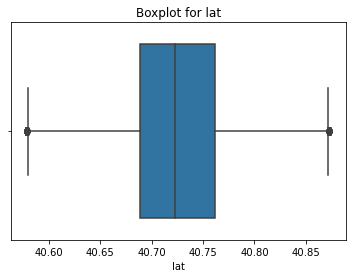

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


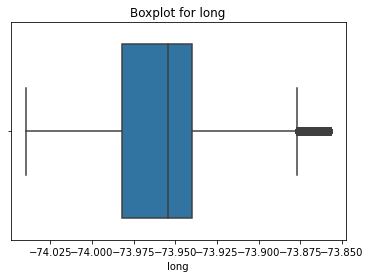

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


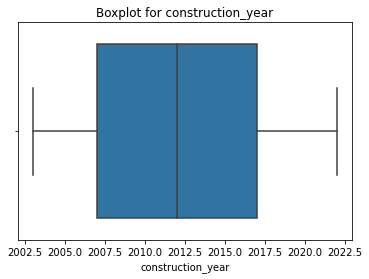

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


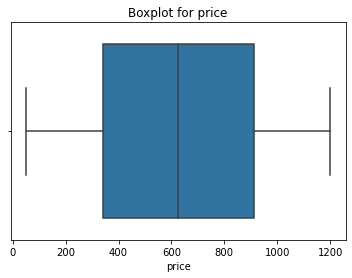

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


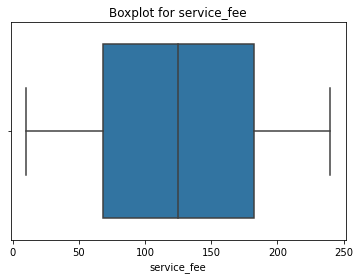

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


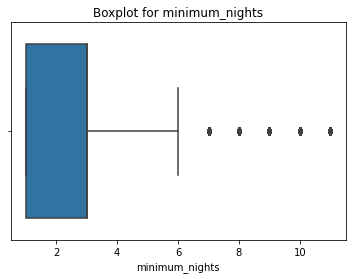

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


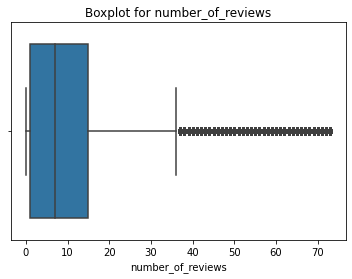

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


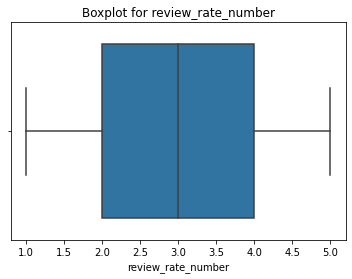

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


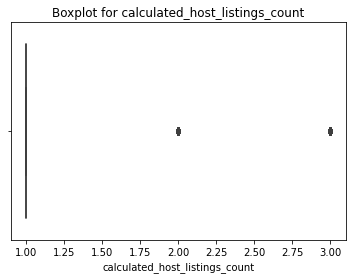

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


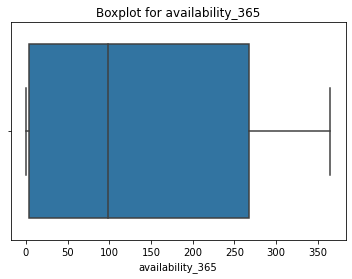

In [102]:
numeric_cols = data.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

*************************************************

Now we'll add column 'total_cost' which is calculte total cost for both 'price' and 'service_fee'

In [103]:
data['total_cost'] = data['price'] + data['service_fee']

In [104]:
data['total_cost']

0         1159.000000
1          170.000000
2          744.000000
3          442.000000
4          245.000000
             ...     
102053     820.892227
102054    1033.892227
102055     511.892227
102056     972.203971
102057    1252.203971
Name: total_cost, Length: 102058, dtype: float64

In [105]:
data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'total_cost'],
      dtype='object')

## Analyze data

In [106]:
# create a function to plot bar chart

def plot_bar_chart(column_name: str, hue: str=None, top_values: int = None, palette: str = "flare", show_grid : bool = True, 
                   figsize: tuple = (16, 9), bar_font_size: int=14, bar_angle: int=45, angle: int=45):
    fig = plt.figure(facecolor = (247/255, 247/255, 247/255), figsize = figsize)
    ax = plt.subplot(1, 1, 1)
    
    ax.set_facecolor((247/255, 247/255, 247/255))
    counts = None
    
    if top_values is not None:
        counts = data[column_name].value_counts().iloc[:top_values]
    else:
        counts = data[column_name].value_counts()
        
    bar_ax = sns.barplot(x = counts.keys(), y = counts, palette = palette, ax = ax, hue = data[hue] if hue is not None else None) 
    
    for i in bar_ax.containers:
        bar_ax.bar_label(i, rotation=bar_angle, fontsize = bar_font_size)
        
    plt.xticks(rotation = angle, fontsize = 14)
    plt.xlabel(f"{column_name}", fontweight="bold", fontsize = 18)
    plt.ylabel("count", fontweight="bold", fontsize = 18)
    plt.title(f"Top {top_values} {column_name}" if top_values is not None else f"{column_name}", fontsize = 27)
    if show_grid: plt.grid()
    plt.show()

In [107]:
# create a function to plot pie/donut chart
def plot_pie_chart(column_name: str, startangle: int=45, loc: str="center", explodes: float=0.09, colors: list = None):
    values = data[column_name].value_counts()
    keys = values.keys()
    total_records = data[column_name].count()

    labels = ["{0} - {1:1.2f} %".format(i, j/total_records * 100) for i, j in zip(keys, values)]
    explodes = [explodes/len(keys) for i in range(len(keys))]

    plt.subplots(figsize = (16, 9))
    # draw the pie chart
    patches, texts = plt.pie(values, startangle = startangle, explode = explodes, colors = colors)

    # draw circle
    center_circle = plt.Circle(xy = (0, 0), radius = 0.70, fc = "white")
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    plt.title(column_name, fontsize = 25, fontweight = "bold")
    plt.legend(patches, labels, loc=loc, fontsize = 14)
    plt.show()

In [108]:
# create a function to plot line chart
def plot_line_chart(column_name, xlabel, ylabel, title):
    value = data[column_name].value_counts().sort_index()
    keys = np.array(value.keys(), dtype = np.int16)

    fig = plt.figure(facecolor = (247/255, 247/255, 247/255), figsize = (16, 7))
    ax  = plt.subplot(1, 1, 1)
    ax.set_facecolor((247/255, 247/255, 247/255))
    ax.plot(value, 'o--', c="black", markerfacecolor='none', markersize=12, markeredgecolor="red", markeredgewidth = 3, linewidth=2)
    plt.xlabel(xlabel, fontsize = 20, fontweight = "bold")
    plt.ylabel(ylabel, fontsize = 20, fontweight = "bold")
    plt.xticks(ticks = keys, fontsize = 12, rotation = 15)
    plt.title(title, fontsize = 24, fontweight = "bold")
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


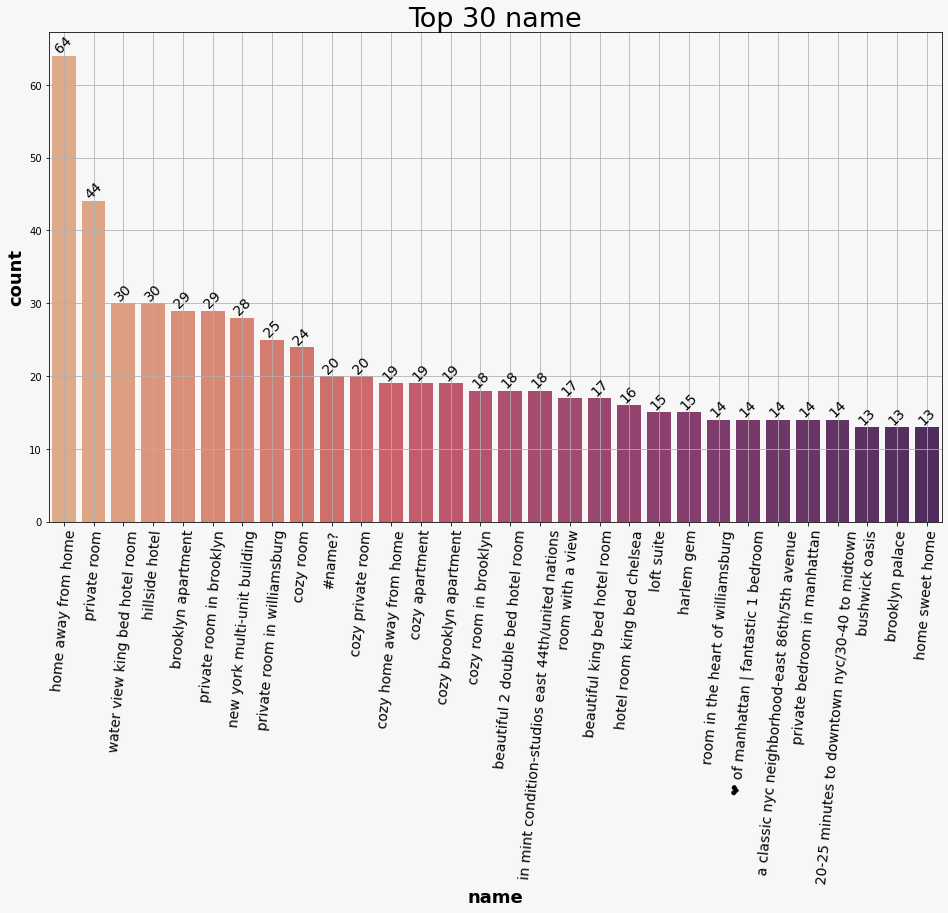

In [109]:
plot_bar_chart(column_name = "name", top_values = 30, palette = "flare", show_grid = True, angle = 85)

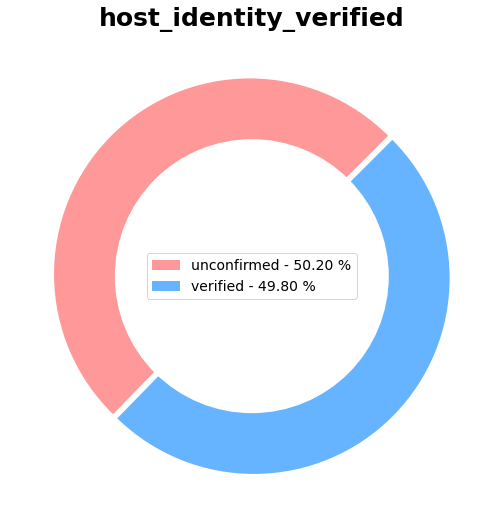

In [110]:
plot_pie_chart("host_identity_verified", explodes = 0.03, colors = ["#ff9999", "#66b3ff"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


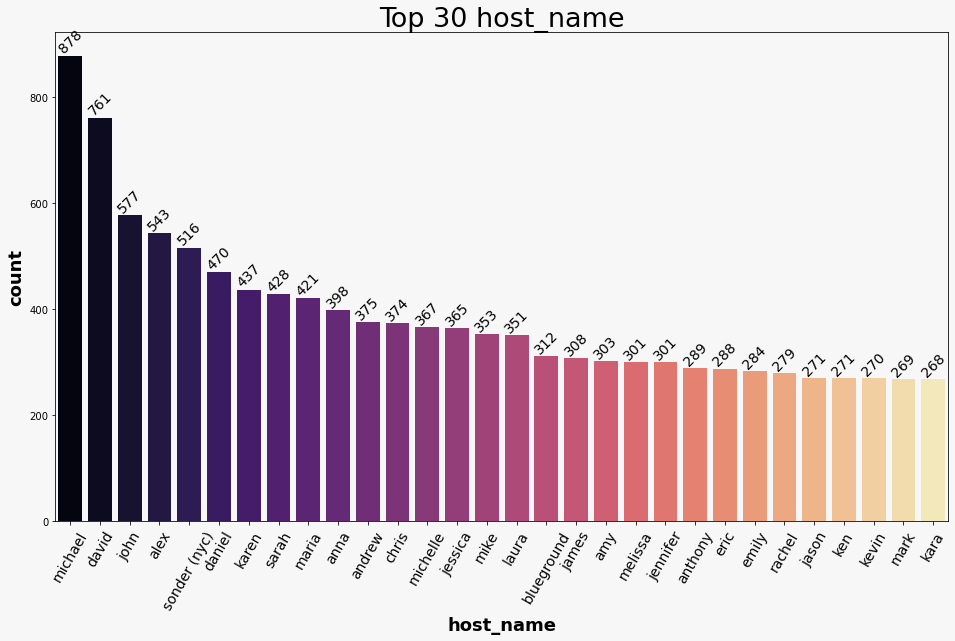

In [112]:
plot_bar_chart("host_name", top_values = 30, palette = "magma", show_grid = False, angle = 60)

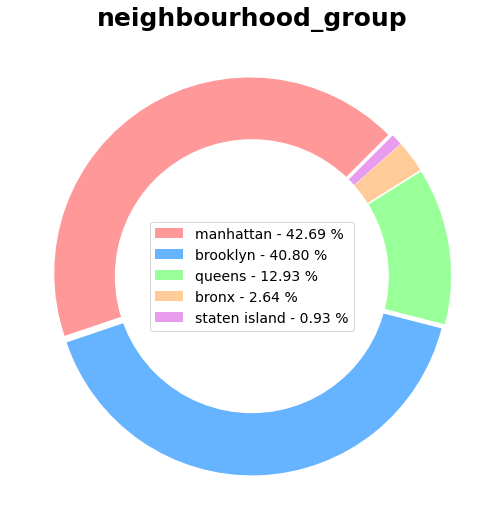

In [113]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', "#e79cee", "#9ce7ee", "#d9ee9c"]
plot_pie_chart("neighbourhood_group", explodes = 0.09, colors = colors)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


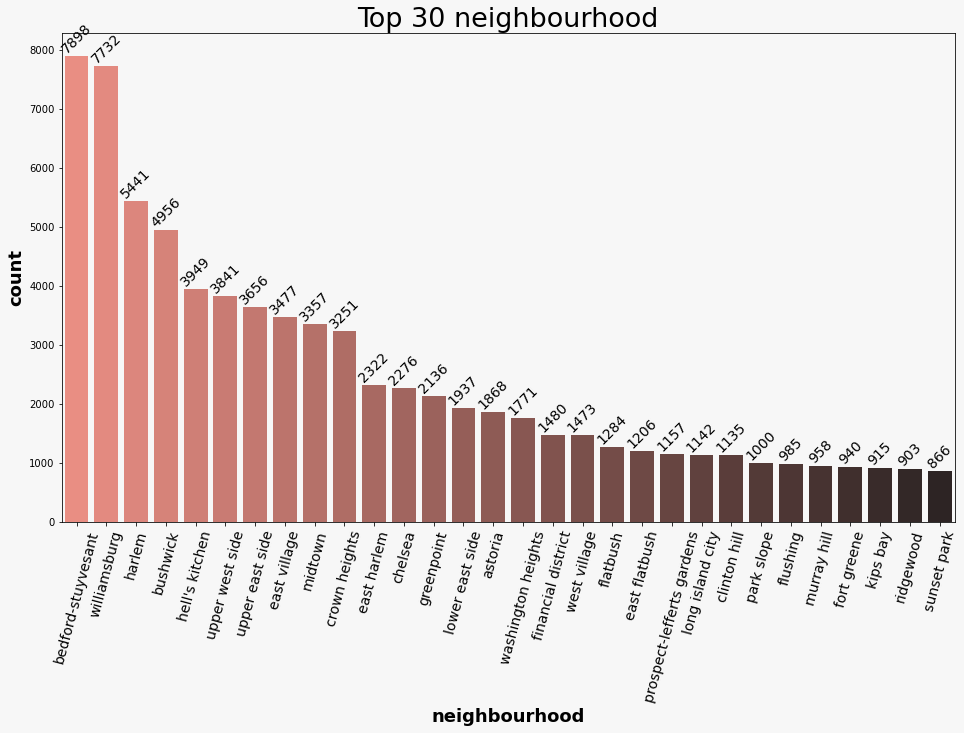

In [114]:
plot_bar_chart("neighbourhood", top_values = 30, palette = "dark:salmon_r", show_grid = False, angle = 75)


C:\Users\mk_aljermy\AppData\Local\Temp\ipykernel_5448\4038860293.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres")
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

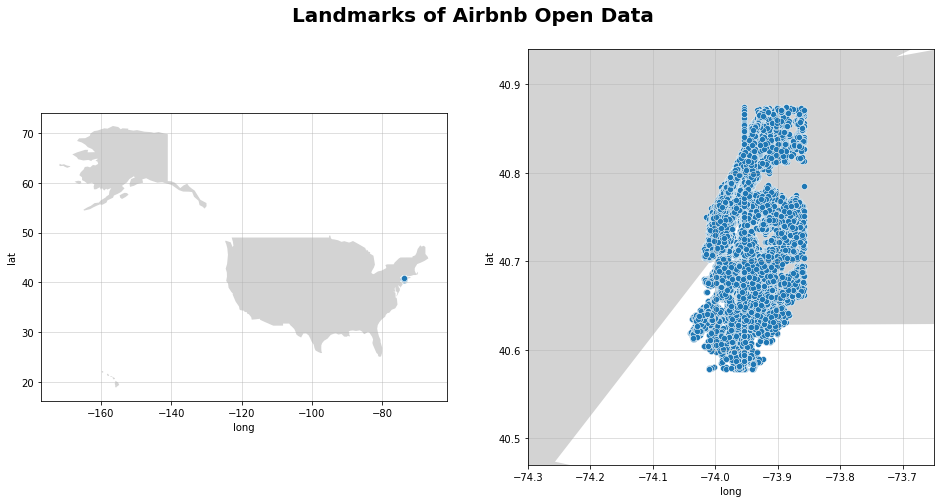

In [115]:
# visualize the land marks on the world map
import geopandas as gpd

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,16))

countries = gpd.read_file(
     gpd.datasets.get_path("naturalearth_lowres")
)

countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax[0])
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax[1])

sns.scatterplot(x = "long", y = "lat", data = data, ax = ax[0])
sns.scatterplot(x = "long", y = "lat", data = data, ax = ax[1])
ax[0].grid(visible=True, alpha=0.5)
ax[1].grid(visible=True, alpha=0.5)

ax[1].set_xlim([-74.3, -73.65])
ax[1].set_ylim([40.47, 40.94])

plt.suptitle("Landmarks of Airbnb Open Data", x = 0.5, y = 0.72, fontweight = "bold", fontsize = 20)
plt.show()

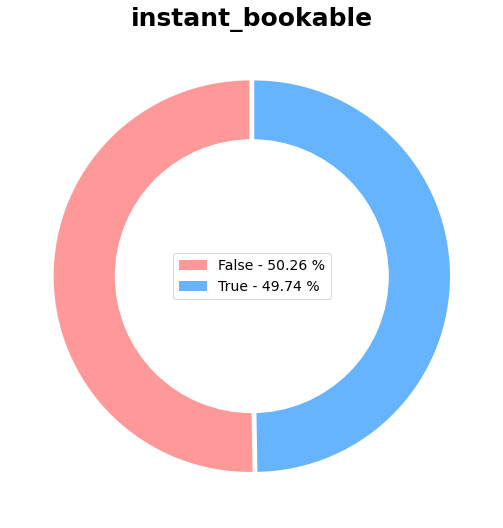

In [116]:
plot_pie_chart(column_name = "instant_bookable", startangle = 90,
               explodes = 0.025, colors = ['#ff9999','#66b3ff'])

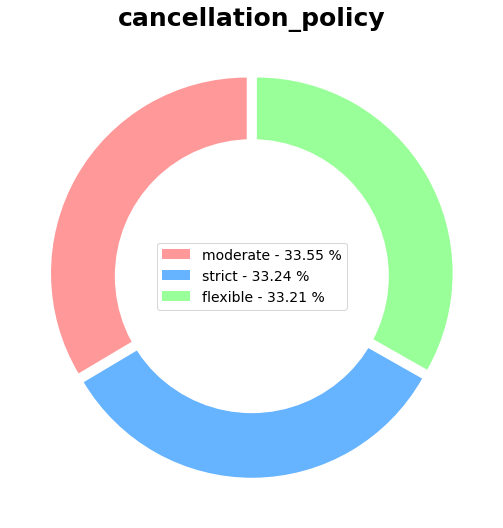

In [117]:
plot_pie_chart("cancellation_policy", startangle = 90, 
               colors = ['#ff9999','#66b3ff','#99ff99'])

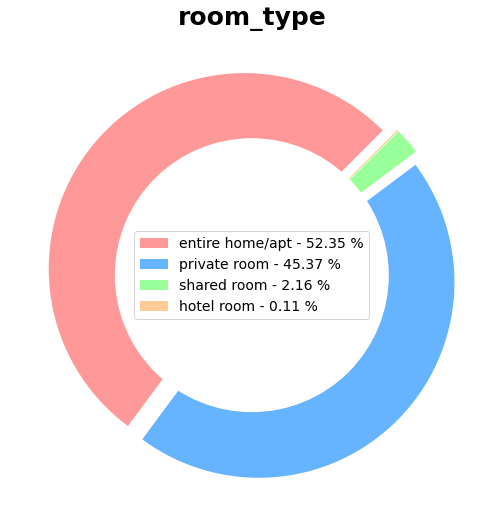

In [118]:
plot_pie_chart(column_name="room_type", explodes=0.2, 
               colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'])

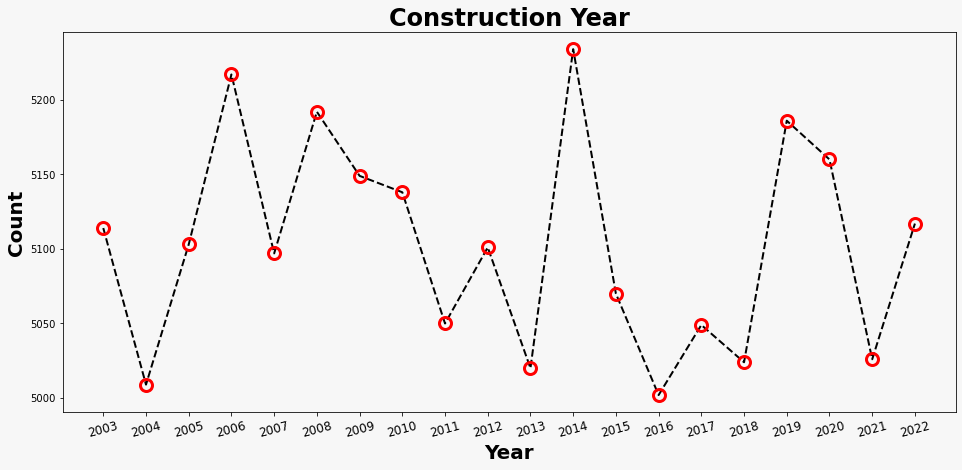

In [119]:
plot_line_chart("construction_year", "Year", "Count", "Construction Year")

In [130]:
import plotly.express as px

# Sort the DataFrame by 'service_fee' in descending order and select the top 30 rows
top_30_df = data.sort_values(by='price', ascending=False).head(30)

# Create the bar plot using Plotly Express
fig = px.bar(top_30_df, x='price', y='name', 
             labels={'name': 'Hotel Name', 'price': 'Price'},
             title='Top 30 Hotels by Price')

# Customize the appearance of the plot (optional)
fig.update_layout(xaxis_title_text='Price', yaxis_title_text='Hotel Name')
fig.update_traces(marker_color='royalblue')  # Change the bar color if desired

# Show the plot
fig.show()


In [135]:
# Sort the DataFrame by 'service_fee' in ascending order and select the bottom 30 rows
bottom_30_df = data.sort_values(by='price').head(30)

# Create the bar plot using Plotly Express
fig = px.bar(bottom_30_df, x='price', y='name', 
             labels={'price': 'Price', 'name': 'Hotel Name'},
             title='Bottom 30 Hotels by Price')

# Customize the appearance of the plot (optional)
fig.update_layout(xaxis_title_text='Price', yaxis_title_text='Hotel Name')
fig.update_traces(marker_color='red')  # Change the bar color if desired

# Show the plot
fig.show()


In [136]:
# Sort the DataFrame by 'service_fee' in descending order and select the top 30 rows
top_30_df = data.sort_values(by='service_fee', ascending=False).head(30)

# Create the bar plot using Plotly Express
fig = px.bar(top_30_df, x='service_fee', y='name', 
             labels={'name': 'Hotel Name', 'service_fee': 'Service Fee'},
             title='Top 30 Hotels by Service Fee')

# Customize the appearance of the plot (optional)
fig.update_layout(xaxis_title_text='Service Fee', yaxis_title_text='Hotel Name')
fig.update_traces(marker_color='royalblue')  # Change the bar color if desired

# Show the plot
fig.show()


In [137]:
# Sort the DataFrame by 'service_fee' in ascending order and select the bottom 30 rows
bottom_30_df = data.sort_values(by='service_fee').head(30)

# Create the bar plot using Plotly Express
fig = px.bar(bottom_30_df, x='service_fee', y='name', 
             labels={'service_fee': 'Service Fee', 'name': 'Hotel Name'},
             title='Bottom 30 Hotels by Service Fee')

# Customize the appearance of the plot (optional)
fig.update_layout(xaxis_title_text='Service Fee', yaxis_title_text='Hotel Name')
fig.update_traces(marker_color='red')  # Change the bar color if desired

# Show the plot
fig.show()


In [140]:
# Sort the DataFrame by 'service_fee' in descending order and select the top 30 rows
top_30_df = data.sort_values(by='total_cost', ascending=False).head(30)

# Create the bar plot using Plotly Express
fig = px.bar(top_30_df, x='total_cost', y='name', 
             labels={'name': 'Hotel Name', 'total_cost': 'Total Cost'},
             title='Top 30 Hotels by Total Cost')

# Customize the appearance of the plot (optional)
fig.update_layout(xaxis_title_text='Total Cost', yaxis_title_text='Hotel Name')
fig.update_traces(marker_color='royalblue')  # Change the bar color if desired

# Show the plot
fig.show()


In [138]:
# Sort the DataFrame by 'service_fee' in ascending order and select the bottom 30 rows
bottom_30_df = data.sort_values(by='total_cost').head(30)

# Create the bar plot using Plotly Express
fig = px.bar(bottom_30_df, x='total_cost', y='name', 
             labels={'total_cost': 'Total Cost', 'name': 'Hotel Name'},
             title='Bottom 30 Hotels by Total Cost')

# Customize the appearance of the plot (optional)
fig.update_layout(xaxis_title_text='Total Cost', yaxis_title_text='Hotel Name')
fig.update_traces(marker_color='red')  # Change the bar color if desired

# Show the plot
fig.show()


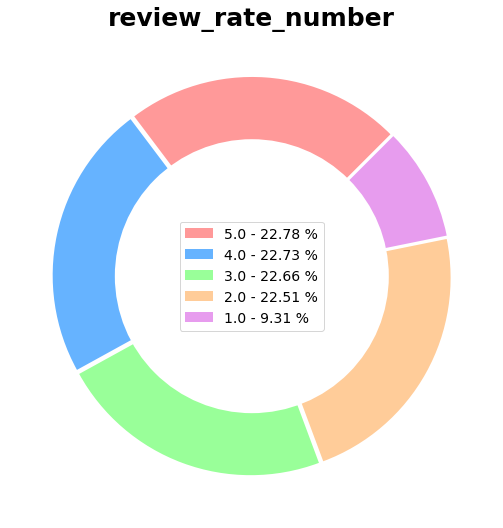

In [152]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', "#e79cee", "#9ce7ee", "#d9ee9c"]
plot_pie_chart("review_rate_number", explodes = 0.09, colors = colors)

In [141]:
#data.to_csv('clean_data.csv')